In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/linkedin-reviews.csv")
df.head(3)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


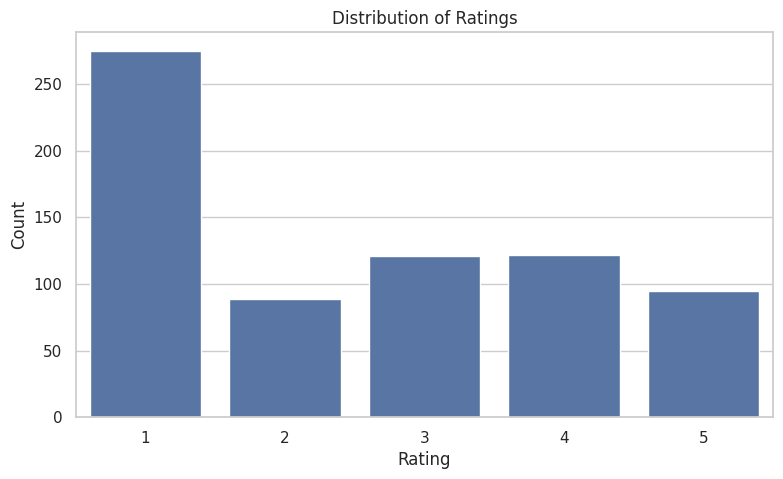

In [5]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df , x ='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [6]:
!pip install textblob

In [7]:
from textblob import TextBlob

In [8]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else:
        return 'Neutral'

In [9]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [10]:
df.sample(5)

,Review,Rating,Sentiment
467,Very slow to load anything. Barely usable. Gal...,2,Negative
294,No sync config options. Drains battery. Can't ...,1,Negative
253,This app is really slow to load and often lock...,2,Negative
433,this app should be great. But last update just...,4,Positive
314,Please update. Passwords cannot be in the clear.,5,Positive


In [11]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Positive,298
Neutral,297
Negative,107


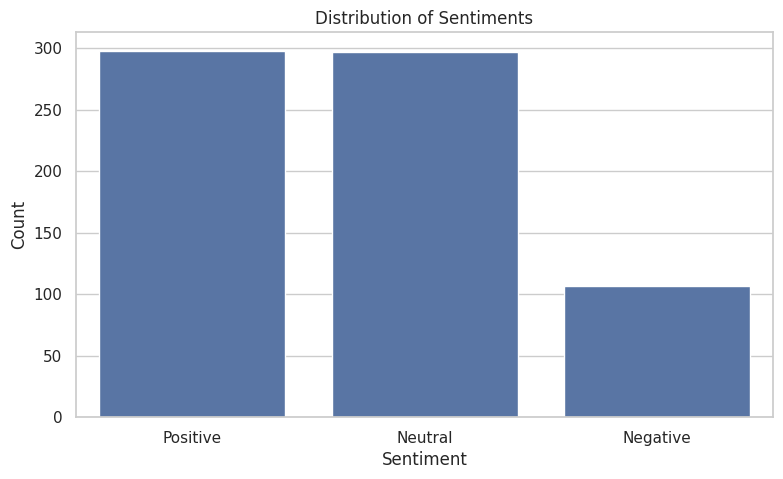

In [15]:
plt.figure(figsize=(9,5))
sns.barplot(x = sentiment_distribution.index ,
            y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

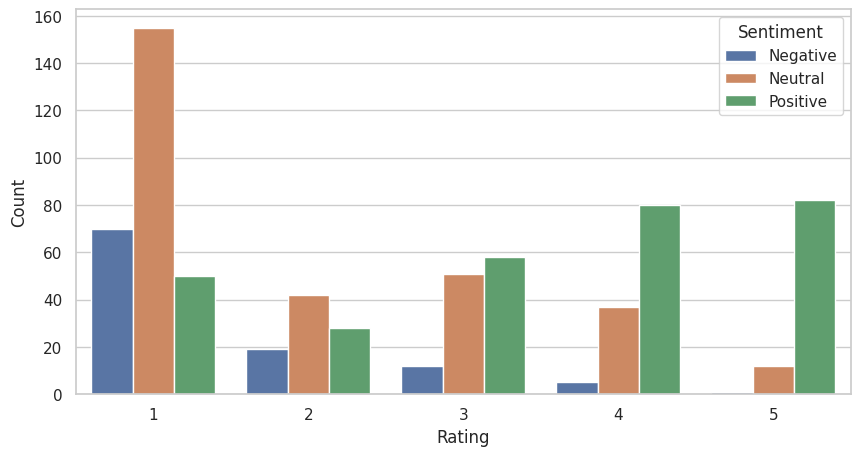

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
             x = 'Rating',
             hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()